<a href="https://colab.research.google.com/github/Projas-14/ADA-informes/blob/main/informe_Corte_de_varilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de corte de varillas

## Descripción del problema.

Somos dueños de una empresa que vende **varillas de metal**, para ello tenemos varillas largas y luegos se corta en varillas mas pequeñas, entonces queremos saber cual es la mejor forma de corta dicha varillas, para venderlas por **pulgadas**. con lo cual tenemos una lista de distintos precios segun su logitud.

Entonces buscamos saber cuantas varillas y de que logitud debemos vender para maximizar nuestra ganancia.



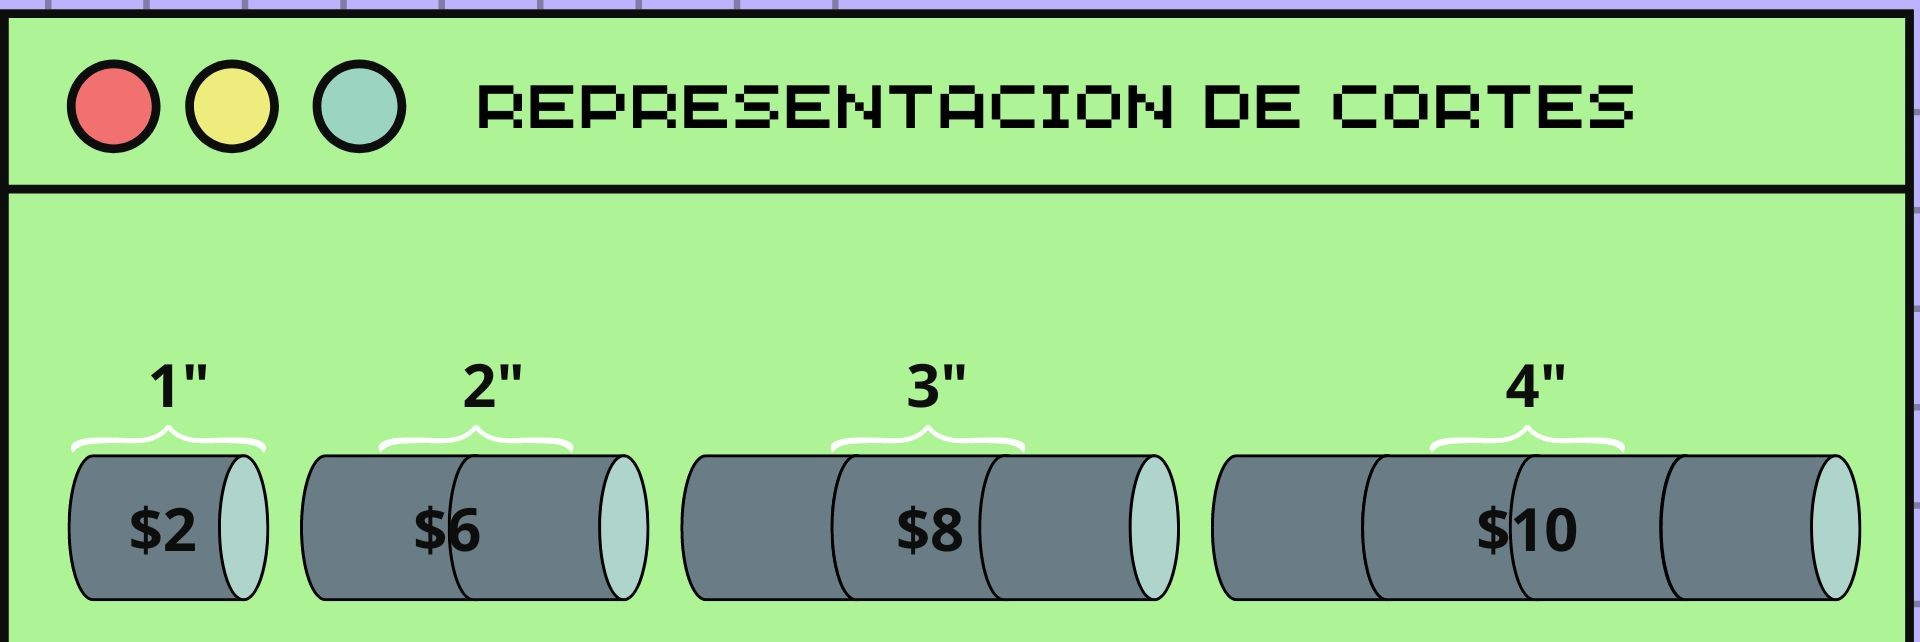

Tenemos inicialmente una varilla de largo *n* pulgadas y una lista de precios **p** en función del largo del corte *i*, donde $1 \leq i \leq n$ que se ve representado en la siguiente imagen.
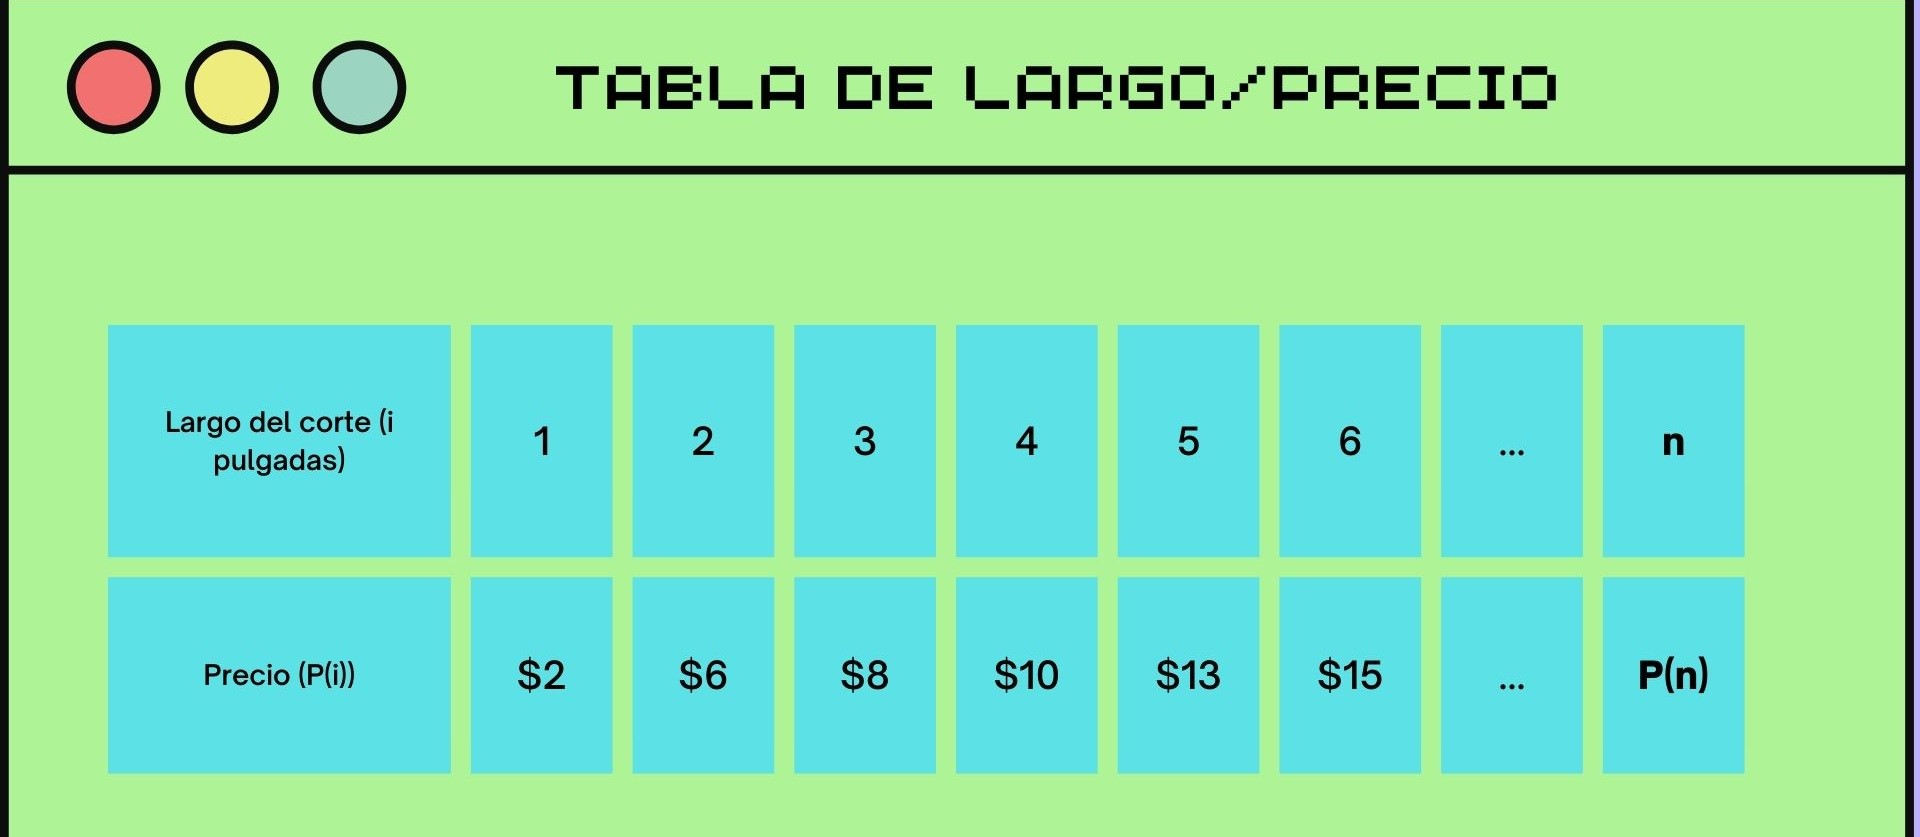

Con la cual podemos saber en cuantas partes y que longitud debemos cortar la varilla de forma de obtener **la ganancia máxima posible**

Entonces la combinaciones existente para saber cual es la forma de cortar dicha varillas, el cual sera dado por $2^{n-1}$.

Ejemplo:


> tenemos una varilla de largo 5, existen 16 combinanciones posibles de cortes. 



# Implemente un algoritmo recursivo para resolver el problema del corte de varillas.
Una forma de solucionar este problema es con el metodo recursivo o tambien conocido como fuerza bruta, el cual consiste en probar todas las combinaciones posibles es decir $2^{n-1}$.


implementacion del codigo python

In [47]:
def corte_varilla_recursiva(precios, largo, verbose = False):
  global rec 
  #se busca saber cuantas llamadas recursiva se realizaron.
  rec = rec + 1

  #caso Base retorna 0 y una lista vacia
  if(largo <= 0):
    return 0 , []

  
  #valor maximo con el menor  numero posible.
  valor_maximo =  float('-inf')
  # Guarda los cortes 
  Cortes = [] 
  
  for i in range(1,largo+1):
    #valor maximo para cada subproblema
    valor_aux, cortes_aux = corte_varilla_recursiva(precios, largo-i, verbose)
    valor_actual = precios[i-1] + valor_aux

    if valor_actual > valor_maximo:
      valor_maximo = valor_actual
      Cortes = cortes_aux
      Cortes.insert(0,i)

    if verbose == True:
      print(f"Retorno máximo varilla de largo {largo-i} = ({colored(valor_aux, 'red')})")
      print(f"Cortes necesarios: {colored(cortes, 'blue')}")
      print(f"Retorno máximo = {valor_maximo}\n")

    

  
  return valor_maximo , Cortes


In [3]:
precios = [2,6,8,10,13,15]
rec = 0
print("Matriz de precios: ",precios)
print("largo 6")
valor_maximo, cortes = corte_varilla_recursiva(precios,6)
print("El maximo valor es: ", valor_maximo)
print("Cortes: ",cortes)
print("llamadas realizadas: ", rec)





Matriz de precios:  [2, 6, 8, 10, 13, 15]
largo 6
El maximo valor es:  18
Cortes:  [2, 2, 2]
llamadas realizadas:  64


Descripción del algoritmo

Tenemos una entrada en un arreglo *Precios* con los precios para cada largo de varillas $i = 1..n$, y tendremos un parametro largo donde tendremos el largo de la varilla a calcular de modo de retonar el valor_maximo.

Este metodo recursivo va comprobando cada posible combinacion de modo de obtener el maximo valor posible, aun asi su tiempo de ejecucion es elevado dependiendo del largo de la varilla, tiene una complejidad de tiempo exponencial. 

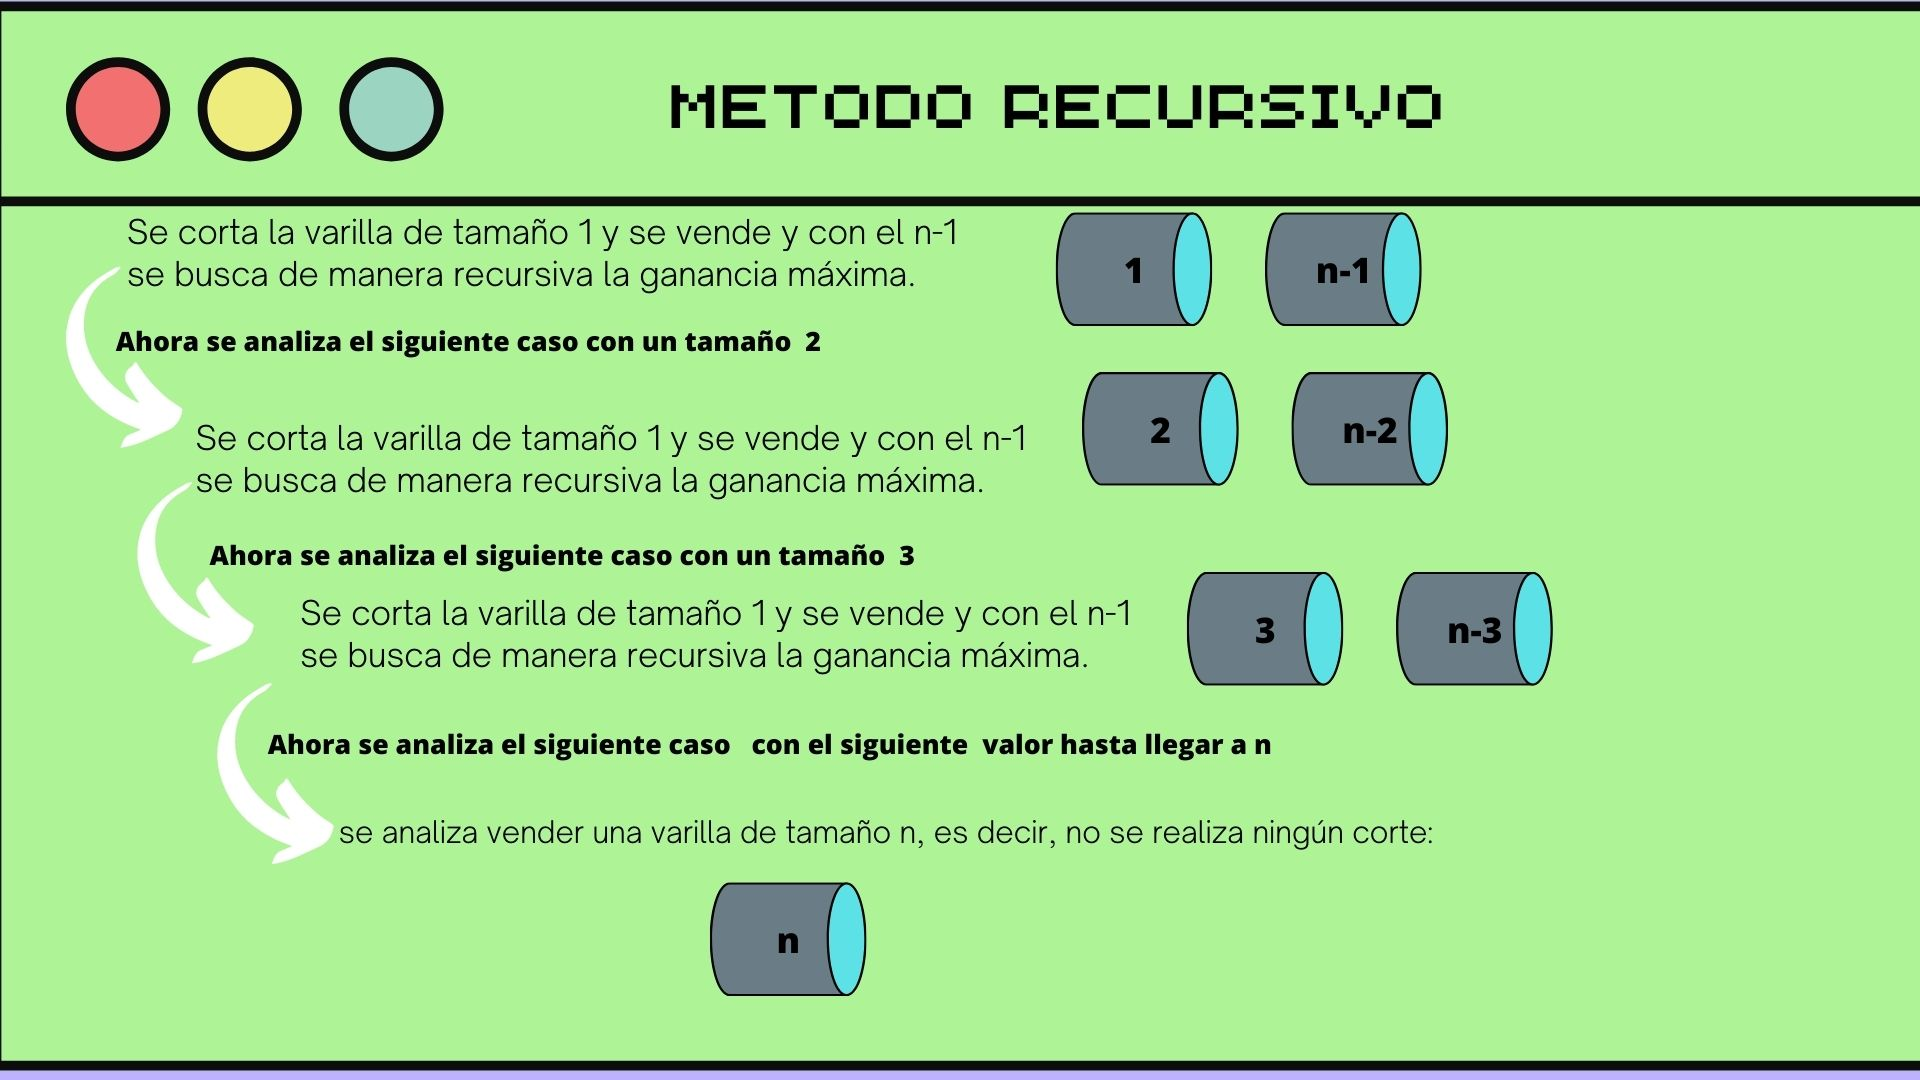


# Implemente un acercamiento bottom-up (programación dinámica) para resolver el problema del corte de varillas.



Otra forma de solucion es la implementación de programación dinámica que consiste en resolver sub-problemas menores primero y luego lo mas grandes.

## codigo pyhon 

In [34]:
from termcolor import colored
def corte_varilla_dinamico(precio, largo, verbose = False):

  global subproblemas
  r = [0 for x in range(largo+1)]
  r[0] = 0

  corte = [0] * (largo+1)


  for i in range(1,largo+1):
    maximo_valor = float("-inf")

    for j in range(1, i+1):

      if verbose == True:
        print(f"Subproblema {i}")
        print(f"r = {r}\n")

      cut = precio[j-1] + r[i-j]

      subproblemas = subproblemas +1

      if cut > r[i]:
        r[i] = cut
        corte[i] = i -j
      if verbose == True:
        print(f"Corte de largo {j}")
        print(f"{colored(f'precio[{j}]', 'green')}")
        print(f"{colored(f'r[{i-j}]', 'blue')}")
    if verbose == True:
      print(f"Retorno máximo  = {colored(r[i], 'blue')}\n") 
  
  cortes = []
  i = largo

  while True:

    if corte[i] == 0:
      if len(cortes) != 0: 
        cortes.insert(0,i)
        break
    

    cortes.insert(0, i-corte[i])
    i = corte[i]


    r[i]= maximo_valor
  if verbose == True:
      print("El maximo valor es: ",r[largo])
      print("Cortes: ",cortes)
      print("Subproblemas resueltos: ", subproblemas)
  
  return r[largo], cortes

In [5]:
precios = [2,6,8,10,13,15]
subproblemas = 0
print("Matriz de precios: ",precios)
print("largo 6")
valor_maximo, cortes = corte_varilla_dinamico(precios,6)
print("El maximo valor es: ", valor_maximo)
print("Cortes: ",cortes)
print("Subproblemas resueltos: ", subproblemas)

Matriz de precios:  [2, 6, 8, 10, 13, 15]
largo 6
El maximo valor es:  18
Cortes:  [2, 2, 2]
Subproblemas resueltos:  21


Descripcion del algoritmo dinamico 

- se puede calcular el retorno máximo $R_n# para un varilla de largo n, con lo cual existen 2 casos

1. El retorno máximo será el precio de la varilla completa
2. el retorno máximo $R_n$ estara dado por un precio $p_i$ donde este sera un corte de varilla de largo $i$ y su retorno maximo del resto de la varilla.

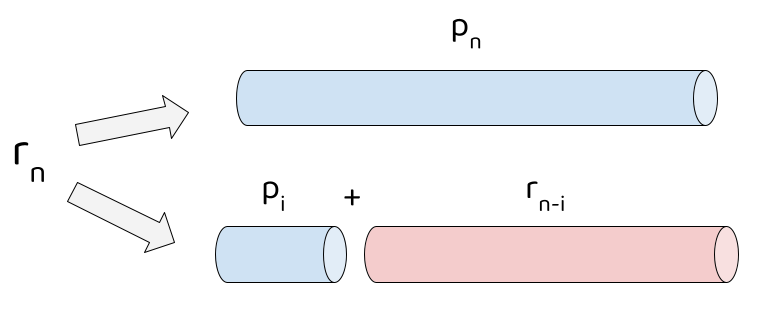

## Ejecución de los algoritmos paso a paso (verbose= true) 

Se implementa el siguiente codigo **cutrod_instance_generator** para generar el listado de precio.


In [6]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

metodo recursivo.

In [48]:
P = cutrod_instance_generator(5)
subproblemas = 0
print("Matriz de precios: ",P)
print("largo 5")
r = corte_varilla_recursiva(P,5,True)

Matriz de precios:  [9, 10, 16, 22, 30]
largo 5
Retorno máximo varilla de largo 0 = (0)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 9

Retorno máximo varilla de largo 1 = (9)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 18

Retorno máximo varilla de largo 0 = (0)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 18

Retorno máximo varilla de largo 2 = (18)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 27

Retorno máximo varilla de largo 0 = (0)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 9

Retorno máximo varilla de largo 1 = (9)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 27

Retorno máximo varilla de largo 0 = (0)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 27

Retorno máximo varilla de largo 3 = (27)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 36

Retorno máximo varilla de largo 0 = (0)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 9

Retorno máximo varilla de largo 1 = (9)
Cortes necesarios: [2, 2, 2]
Retorno máximo = 18

Retorno máximo varilla de largo 0 = (0)
Cortes necesa

metodo recursivo.

In [35]:
P = cutrod_instance_generator(5)
subproblemas = 0
r = corte_varilla_dinamico(P,5,True)

Subproblema 1
r = [0, 0, 0, 0, 0, 0]

Corte de largo 1
precio[1]
r[0]
Retorno máximo  = 9

Subproblema 2
r = [0, 9, 0, 0, 0, 0]

Corte de largo 1
precio[1]
r[1]
Subproblema 2
r = [0, 9, 18, 0, 0, 0]

Corte de largo 2
precio[2]
r[0]
Retorno máximo  = 18

Subproblema 3
r = [0, 9, 18, 0, 0, 0]

Corte de largo 1
precio[1]
r[2]
Subproblema 3
r = [0, 9, 18, 27, 0, 0]

Corte de largo 2
precio[2]
r[1]
Subproblema 3
r = [0, 9, 18, 27, 0, 0]

Corte de largo 3
precio[3]
r[0]
Retorno máximo  = 27

Subproblema 4
r = [0, 9, 18, 27, 0, 0]

Corte de largo 1
precio[1]
r[3]
Subproblema 4
r = [0, 9, 18, 27, 36, 0]

Corte de largo 2
precio[2]
r[2]
Subproblema 4
r = [0, 9, 18, 27, 36, 0]

Corte de largo 3
precio[3]
r[1]
Subproblema 4
r = [0, 9, 18, 27, 36, 0]

Corte de largo 4
precio[4]
r[0]
Retorno máximo  = 36

Subproblema 5
r = [0, 9, 18, 27, 36, 0]

Corte de largo 1
precio[1]
r[4]
Subproblema 5
r = [0, 9, 18, 27, 36, 45]

Corte de largo 2
precio[2]
r[3]
Subproblema 5
r = [0, 9, 18, 27, 36, 45]

Corte d

# Correctitud

**Teorema 1: Correctitud de Corte de varilla (bottom-up)**

El algoritmo retorna correctamente la ganancia máxima $R_n$ el cual se obtiene al dividir la varilla de largo $n$ y vender sus partes.

## Metodo inductivo.

Se demostrara la hipótesis $P(n)$ atravez de inducion.

### Caso Base:
- Para n = 1, el algoritmo retorna el precio para una varilla de largo 1, debido que es el tamaño mínimo que puede tener una varilla para ser vendida, y como esta no se puede dividir es el unico valor, existiendo un unico caso para el valor de $R_n$.

### Paso Inductivo:
Ahora para p(n+1), se calcula la ganancia de $R_n$ de modo que j = 1,..,n. donde j sera nuestro el tamaño de todos los posibles subproblemas en que se puede dividir la varilla original, de tal modo que la funcion $R_n(j)$ se expresa como:

- $R_n(j)=Precio_j+r_{n−j}$
 
 donde sabemos que $Precio_j$ corresponde al precio de una varilla de largo j, y $+r_{n−j}$ es la ganacia maxima (es decir lo que sobra del largo de la varilla (n-j).

 Ahora por el paso inductivo, se tiene que la ganacia maxiama para cualquier varilla simpre sera $n-j$ y a su vez $1 \leq j$, y este se calcula correctamente.

Entonces al finalizar el algoritmo se tiene que se retorna el valor de $r_{n}$ el cual es el maximo de todos los valores obtenidos, esto es debido que la funcion $R_n(j)$ considera todos aquellos sub-problemas que resultan al dividir la varilla original, entonces se tiene que estos valores siempre sera el que maximice la solucion final. Por lo tanto como la hipotesis se cumple para el caso base y el inductivo sabemos que la correctitud del algoritmo es correcta.

#Tiempo de ejecución y complejidad espacial

Teorema 2: Tiempo de ejecución del algoritmo  Corte de varilla (bottom-up).

El algoritmo tiene un **tiempo de ejecución** $\Theta(n^2)$

Para comprobar su tiempo de ejecución podemos plantear la siguiente función para calcular la cantidad total de subproblemas resueltos por el algoritmo:

$\sum\limits_{i=1}^{n} i=\frac{n(n+1)}{2}$

Como el tiempo que se tiene para resolver cada sub-problema es constante, esto es debido que se aplica la función $r_{n}(j) = P_{j} + r_{n-j}$, el cual cada valor tienee un tiempo especifico $O(1)$.


entoces para reconstruir la solución se tiene que obtener los cortes necesarios para la varilla, tiene un tiempo de ejecución $ O(n)$, notemos que no existe un peor ni un mejor caso para este algoritmo. Puesto que se trata de un algoritmo de optimización sin importar los valores de entrada para el precio de cada subdivision de la varilla.

Entonces podemos tener que la formula sera:
$T(n) = f(n) + g(n) + h(n)$
* f(n) sera la cantidad de sub-problemas 
* g(n) tiempo para resolver cada sub-problema
* h(n) tiempo de reconstruir

entonces obtenemos que:

$T(n) = O(n^2) + O(1) + O(n)$

de este modo su su complejidad con la notación $\Theta(n^2)$



Complejidad espacial del algoritmo corte de varilla (bottom-up)
iene una complejidad espacial $O(n)$ esto es debido que se hace uso de dos arreglos R y Corte los cuales guardan el maximo retorno y los cortes necesarios, como estos se inicia eal comienzo del algoritmo, se tiene que su complejidad espacial es $O(n)$. 

# Experimentos
Para el primer experimento se tiene analizara 
# Comparación entre implemetacion recursiva y dinamica

Cabe destacar para realizar este experimento se haran con dos graficos separados debido que el tiempo de ejecucion recursivo tiene un crecimento exponencial.



Tiempo experimental de Corte de varilla(recursivo)
Se tomaran en cuenta los valores del arreglo  Precio serán generados de forma aleatoria para el *largo* entre  $[5,2]$


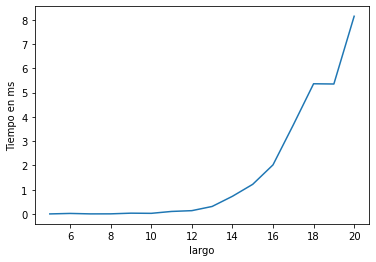

In [8]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y1=[];

for largo in range(5,21):
  Precio = cutrod_instance_generator(largo)

  t1 = repeat(setup="from __main__ import corte_varilla_recursiva", stmt=f"corte_varilla_recursiva({Precio}, {largo})", repeat=1, number=10)

  x.append(largo)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('largo')
plt.ylabel('Tiempo en ms')
plt.show()

Observaciones:
El tiempo de ejecucion para este grafico fue de aproximado 15s.
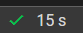 

Cabe destacar que esto era de experarse debido que la tasa de crecimiento de una complejidad $O(2^n)$ para el algoritmo de forma recursiva.




Tiempo experimental de Corte de varilla (bottom-up)
Para este gráfico, los valores del arreglo  Precio serán generados de forma aleatoria con  largo entre [1,1000]


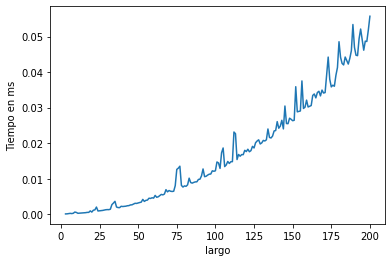

In [9]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[];
y1=[];

for largo in range(3,201):
  Precio = cutrod_instance_generator(largo)

  t1 = repeat(setup="from __main__ import corte_varilla_dinamico", stmt=f"corte_varilla_dinamico({Precio}, {largo})", repeat=1, number=10)

  x.append(largo)
  y1.append(t1)

plt.plot(x,y1)
plt.xlabel('largo')
plt.ylabel('Tiempo en ms')
plt.show()

Observaciones: El tiempo de ejecucion para este grafico fue de aproximado 3segundos. para 200 evaluaciónes image.png

Cabe destacar que esto era de experarse debido que la tasa de crecimiento de una complejidad $ O(n^2)$  para el algoritmo de forma recursiva.

***Análisis de resultados:*** Se puede apreciar en los gráfico que el recursivo tiende a tener una subida exponencial, siendo que cuenta con menos datos y el algoritmo dinamico una tendencia cuadratica, siendo fiel reflejo de sus complejidades. 
Tambien se observa un Peaks en el tiempo de ejecucion de para ambos algoritmo esto puede ser por el procedimiento que ocupan recurso del procesador u otro comportamiento irregular, en conclusion para arreglos de largo mayores el metodo recursivo no es factible debido que tendra un mayor tiempo de ejecución entonces es recomendable el dinamico.


## Analisis de cantidad de problemas a resolver con el metodo bottom-up

El gráfico compara la cantidad problemas que debe resolver el algoritmo en relación al tamaño del problema, para ello tomamremos arreglo  entre $[3,400]$

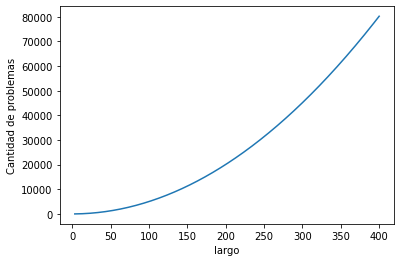

In [13]:
import matplotlib.pyplot as plt
import random

x = []; 
y = []; 

for largo in range(3,401):
  precio = cutrod_instance_generator(largo)
  subproblemas = 0
  corte_varilla_dinamico(precio,largo)
  x.append(largo)
  y.append(subproblemas)

plt.plot(x,y)

plt.xlabel('largo')
plt.ylabel('Cantidad de problemas')
plt.show()

***Análisis de resultados***
por lo observado se puede apreciar que la cantidad de subproblemas aumenta cuadráticamente en relación al tamaño. Esto queda aun más comprobado que su complejidad  O(n2) el cual se puede apreciar de forma clara en el grafico.

Adicionalmente no se aprecia ningun cambio significativo en el grafico por lo que se cree que el algoritmo se comporta de forma estable.